# Jupyter notebooks for remote science (on Colab)

Computational notebooks have massively gained in popularity in the past years. They allow to share rich documents with text, code, mathematical formulas, images, videos etc. both in static and interactive ways. They are heavily used both in research to document projects and in teaching to provide content support. Notebooks exist in different flavors, but currently the most popular form is the Jupyter (**Ju**lia, **Py**thon, **R**) notebook. Here, we briefly describe  1. [What type of content they can be used for](#1.-What-is-a-notebook), 2. [Solutions to write/run notebooks online (no installation required)](#2.-Using-Jupyter-notebooks), 3. [How to share the documents, interactively or not and](#3.-Sharing-documents) 4. [A few examples of courses given as notebooks](#4.-Examples-of-courses).

## 1. What is a notebook

Notebooks are interactive documents with rich content that run directly in the internet browser. They are composed of series of blocks, called cells that can be executed individually. Notebooks are typically used when computer coding is involved but they provide a rich environment to create interactive documentation in general. So even if you don't need the coding part, you can still use notebooks to create documents and use the many existing resources to share them. 

Notebooks are composed of mainly two types of cells: text cells and code cells.

### Text cells

#### Markdown
The content of text cells is formatted using the Markdown language, a very simple markup language allowing to create formatted text. For example *italic* and **bold** are generated by surrounding text with one ```*italic*```or two stars ```**bold**```. Titles and subtitles are generated by preceding text by a series of hash signs ```# My Title```, ```## My subtitle```.

#### Images
Images can be embedded using either a simple markdown syntax ```![](myimage)``` or directly html language which can be customized (e.g. for image size) ```<img src="myiamge" style="width: 100px;"/>``` where ```myimage``` is a path or a weblink to an image (e.g. https://img.myswitzerland.com/671846/407):
<img src="https://img.myswitzerland.com/671846/407" style="width: 100px;"/>

#### Equations
Fortunately, Jupyter also allows to embed $\LaTeX$ text. There a multiple solutions for this: surround your equation $\vec F = m*\vec{a}$ with dollar signs ```$\vec F = m*\vec{a}$```, use double dollar ```$$\vec F = m*\vec{a}$$``` to create a block:
$$\vec F = m*\vec{a}$$
or in a separate cell use the standard ```\begin{equation} ... \end{equation}```:

\begin{equation}
\vec F = m*\vec{a}
\end{equation}

### Code cells

#### Computational code
The most common type of code cell, is a cell with actual computational code demonstrating some algorithm or function. It has an input and if some output is generated also an output cell:

In [1]:
def my_fun(x):
    y = x**2 + 3*x + 2
    return y

my_fun(5)

42

Not only numerical calculations are possible but also symbolic ones, e.g. using sympy. On Google Colab, you have to take care of package import and various settings directly in the notebook. Here we install the appropriate version of the sympy package:

In [ ]:
!pip install sympy==1.2

And we make sure that the output of sympy is formatted as $\LaTeX$:

In [ ]:
from sympy import init_printing
def custom_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sympy.printing.latex(exp,**options)
init_printing(use_latex="mathjax",latex_printer=custom_latex_printer)
import sympy

Finally we can do our actual calculation:

In [8]:
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, FloatSlider
import numpy as np
import matplotlib.pyplot as plt

t, k, c, y_0, ydot_0 = sympy.symbols('t k c y_0 ydot_0')
y = sympy.Function('y')
damped_oscillator = sympy.Eq(y(t).diff(t, t) + c* y(t).diff(t) + k*y(t), 0)
fun_solved = sympy.dsolve(damped_oscillator, y(t), ics={y(0):y_0, y(t).diff(t,1).subs(t, 0): ydot_0})

In [9]:
damped_oscillator

Eq(c*Derivative(y(t), t) + k*y(t) + Derivative(y(t), (t, 2)), 0)

In [10]:
fun_solved

Eq(y(t), (y_0*(c + sqrt(c**2 - 4*k))/2 + ydot_0)*exp(t*(-c + sqrt(c**2 - 4*k))/2)/sqrt(c**2 - 4*k) + (-c*y_0/2 + y_0*sqrt(c**2 - 4*k)/2 - ydot_0)*exp(t*(-c - sqrt(c**2 - 4*k))/2)/sqrt(c**2 - 4*k))

#### Output code
Code cells can however also be used to display interactive content, in particular the output of an analysis e.g. with Matplotlib:

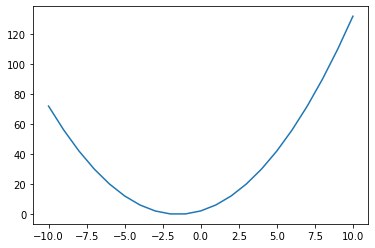

In [11]:
plt.plot(np.arange(-10,11),my_fun(np.arange(-10,11)));

Results can also be shown as interactive plots which the user can play with to get an intuition:

In [12]:
def myfun(var):
    solved = fun_solved.subs({y_0:1, ydot_0:0, k:var, c : 1})
    plot(solved.rhs,ylim = (-1,1),xlim = (0,10));
interact(myfun, var = FloatSlider(min=1, max = 10,step = .5));

interactive(children=(FloatSlider(value=1.0, description='var', max=10.0, min=1.0, step=0.5), Output()), _dom_…

#### Multimedia output

In addition to these standard ways of showing code, Jupyter can also be used to display other types of information. For example a movie uploaded from Youtube:

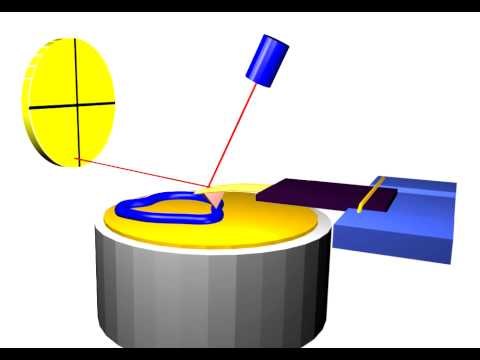

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("6FZ5k9_6Vlw",560,rel=0)

## 2. Using Jupyter notebooks

Of course Jupyter can be installed on any computer, the simplest route being to use Anaconda or Miniconda as a base for installation. Even though this works flawlessly in a large majority of cases, it is often desirable to avoid any installation procedure, especially in the current period where in-person meetings should be avoided. As Jupyter notebooks have become very popular and as they are entirely rendered in the browser, there are many solutions to **run** the notebook on a remote computer and simply display it in the browser. The different solutions vary in the resources available, price etc.

### Renku from the Swiss Data Science Center

The SDSC provides for all academic institutions free access to a Jupyter environment on a platform called [Renku](https://renkulab.io/). It allows to create entire projects including code and data and provides a full fledged access to a Jupyter environment entirely identical to one running on a laptop. One can login with a switch.edu account (your regular @xxx.unibe.ch account) or a Github account and create both private and public projects which are in fact repositories on Gitlab. This service is free.

### Google colab

Google has developed it's own flavor of Jupyter called [Colab](https://colab.research.google.com/). It works exactly in the same way as a regular notebook, only the interface looks slightly different. Here notebooks are saved on the GoogleDrive of the account you are using to connect to Colab. One of the main advantages of this solution is the access to GPUs. This service is free and you can purchase a subscription to enjoy longer sessions and more computing power.

### Mybinder

For those already familiar with Python, Github and Jupyter, an interesting solution is the [mybinder](https://mybinder.org/) service. This allows you to turn any repository on e.g. on GitHub into an interactive Jupyter session. For that, you only have to include in your repository a file specifying the necessary packages to run your code. One negative side is that sessions are temporary, and any changes are lost on session end. This service is free.

### Private JupyterHub

If you need e.g. a highly customized Jupyter environment or the possibility to share large amounts of data you might want to create your own Jupyter service called JupyterHub. Users of such a service are simply provided a link and again connect to the service via their browser, getting access to a standard Jupyter session. ScITS has experience in setting up such services for example using [SWITCHengines](https://www.switch.ch/fr/engines/) computing resources.

## 3. Sharing documents

### File exchange
Jupyter notebooks are simple text files. So you can simply share them as any other file type. For example you can upload all of them on ilias. This means however that to open them, people have to locally install Jupyter. Again in the perspective of avoiding local installations, it is easier to give access to them on some type of server.

### Code repositories and notebook renderer
The most common solution for this is to use a code repository such as GitHub or Gitlab. If you are worried about publicly releasing your work, you can leave repositories private and share them with your students. This however requires all of them to have e.g. a GitHub account. Notebooks can be visualized as static objects by browsing through the repository. Note that even though notebooks are rendered as static objects, the links and videos will still work. 
A more efficient way of displaying notebooks is however to use the [nbviewer](https://nbviewer.jupyter.org/) service, which efficiently renders any notebook. Notebooks created on Renku (see above) can be visualized on Gitlab directly.

### Interactive sharing
As mentioned above, if you want to go beyond rendering static notebooks, you can use mybinder or Google Colab to provide a quick access to interactive versions of your notebooks that collaborators and students can test and modify. You can embed directly in the notebooks badges to further simplify this procedure. Here for Colab:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guiwitz/RemoteJupyter/blob/master/Jupyter_in_remote_times.ipynb)
and here for mybinder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://github.com/guiwitz/RemoteJupyter/blob/master)


## 4. Examples of courses

We finish here by giving a few examples of courses of different nature.

### Computational courses

At ScITS we heavily use notebooks to teach programming in various areas, e.g. image processing. For that course, a [Github repository](https://github.com/guiwitz/PyImageCourse) contains all the course material. One can visualize it directly in the repository or using [nbviewer](https://nbviewer.jupyter.org/github/guiwitz/PyImageCourse/tree/master/). It can even be run interactively using the [mybinder service](https://mybinder.org/v2/gh/guiwitz/PyImageCourse/master).

### Scientific courses

Virtually all disciplines can benefit from being presented at least partially in interactive forms. To see for example how notebooks are used to teach chemistry, you can have a look at [this specific notebook](https://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/02.01-Balancing-Reactions.ipynb#Stoichiometry) from [this course](http://jckantor.github.io/CBE20255/). It contains videos, text, equations, symbolic calculations and is directly executable on Google Colab.

Here's another [great example](https://nbviewer.jupyter.org/github/engineersCode/EngComp3_tourdynamics/blob/master/notebooks_en/3_Get_Oscillations.ipynb) of a course on mechanics and numerical approximations. Again it uses all the resources available in notebooks. Note that if you visit the Github page, you will see this sort of badge [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/engineersCode/EngComp3_tourdynamics/master) telling you, you can run the material in a mybinder session.

